In [156]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv("data/gold.csv")
pd.set_option('display.max_columns', None)  

In [157]:
import pandas as pd

# Filtrer les lignes avec "Montant" supérieur à 5 millions
df_filtered = df[df['Montant'] > 5000000]

# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df_filtered.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df_filtered[~mask]

# Afficher le dataframe filtré
df_filtered


,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler,Continent,niveau_achat,Recency,Frequency,Frequency_reel,Montant
54,489438,21329,28,2009-12-01,2009,12,0.98,18102.0,United Kingdom,27.44,2286.24,9.0,86.0,58.0,0.0,6.0,2.0,8.0,United Kingdom,4.0,0,153.0,145.0,6778621.37
437,489520,35751C,12,2009-12-01,2009,12,0.75,14911.0,EIRE,9.00,733.63,16.0,262.0,232.0,7.0,61.0,44.0,112.0,Europe,4.0,1,510.0,398.0,11931038.60
994,489546,84050,6,2009-12-01,2009,12,1.65,14156.0,EIRE,9.90,584.50,10.0,128.0,64.0,3.0,33.0,10.0,46.0,Europe,4.0,9,202.0,156.0,13873499.47
2595,489702,22086,280,2009-12-02,2009,12,2.55,17511.0,United Kingdom,714.00,3108.64,2.0,41.0,42.0,0.0,11.0,14.0,25.0,United Kingdom,4.0,2,85.0,60.0,7427754.43
4272,489875,79160,11,2009-12-02,2009,12,2.10,17841.0,United Kingdom,23.10,530.76,9.0,119.0,161.0,1.0,34.0,43.0,78.0,United Kingdom,4.0,1,289.0,211.0,5681697.88
4547,489889,22271,96,2009-12-02,2009,12,2.55,14646.0,Netherlands,244.80,4734.24,5.0,84.0,75.0,0.0,9.0,3.0,12.0,Europe,4.0,1,164.0,152.0,29957131.19
14032,490937,22273,24,2009-12-08,2009,12,2.95,13081.0,United Kingdom,70.80,2285.58,1.0,24.0,19.0,0.0,6.0,10.0,16.0,United Kingdom,4.0,1,44.0,28.0,7890866.30
19356,491612,16168S,216,2009-12-11,2009,12,0.09,14298.0,United Kingdom,19.44,849.94,2.0,42.0,40.0,0.0,1.0,1.0,2.0,United Kingdom,4.0,3,84.0,82.0,7788613.81
199041,513987,21917,24,2010-06-30,2010,6,0.42,12415.0,Australia,10.08,2326.74,0.0,7.0,26.0,0.0,0.0,5.0,5.0,Oceania,4.0,24,33.0,28.0,12129731.00
313931,527124,72807A,66,2010-10-14,2010,10,3.81,14088.0,United Kingdom,251.46,12695.14,0.0,6.0,14.0,0.0,3.0,1.0,4.0,United Kingdom,4.0,10,20.0,16.0,5409712.00


In [158]:
df = df[df['Montant'] <= 5000000]


In [159]:
df = df.drop('niveau_achat', axis=1)


In [160]:
# Remplacez "df" par le nom de votre dataframe
summary = df[['Recency', 'Frequency_reel', 'Montant']].describe()

print(summary)


             Recency  Frequency_reel       Montant
count  776313.000000   776313.000000  7.763130e+05
mean       84.818556       23.592154  3.635708e+05
std       138.309471       44.519557  6.067513e+05
min         0.000000        0.000000 -6.381770e+04
25%         7.000000        5.000000  5.227401e+04
50%        23.000000       11.000000  1.468268e+05
75%        80.000000       23.000000  4.131254e+05
max       738.000000      337.000000  4.579872e+06


In [161]:
# Remplacez "df" par le nom de votre dataframe
recency_upper_limit = df['Recency'].quantile(0.95)
frequency_upper_limit = df['Frequency_reel'].quantile(0.95)
monetary_value_upper_limit = df['Montant'].quantile(0.95)

# Remove the outliers
df = df[(df['Recency'] <= recency_upper_limit) & (df['Frequency_reel'] <= frequency_upper_limit) & (df['Montant'] <= monetary_value_upper_limit)]
# Remplacez "df" par le nom de votre dataframe
summary = df[['Recency', 'Frequency_reel', 'Montant']].describe()

print(summary)


             Recency  Frequency_reel       Montant
count  682529.000000   682529.000000  6.825290e+05
mean       65.206768       15.263496  2.451677e+05
std        98.186062       14.180601  2.664897e+05
min         0.000000        0.000000 -6.381770e+04
25%         8.000000        5.000000  5.339824e+04
50%        23.000000       11.000000  1.393058e+05
75%        68.000000       20.000000  3.519682e+05
max       416.000000       79.000000  1.284822e+06


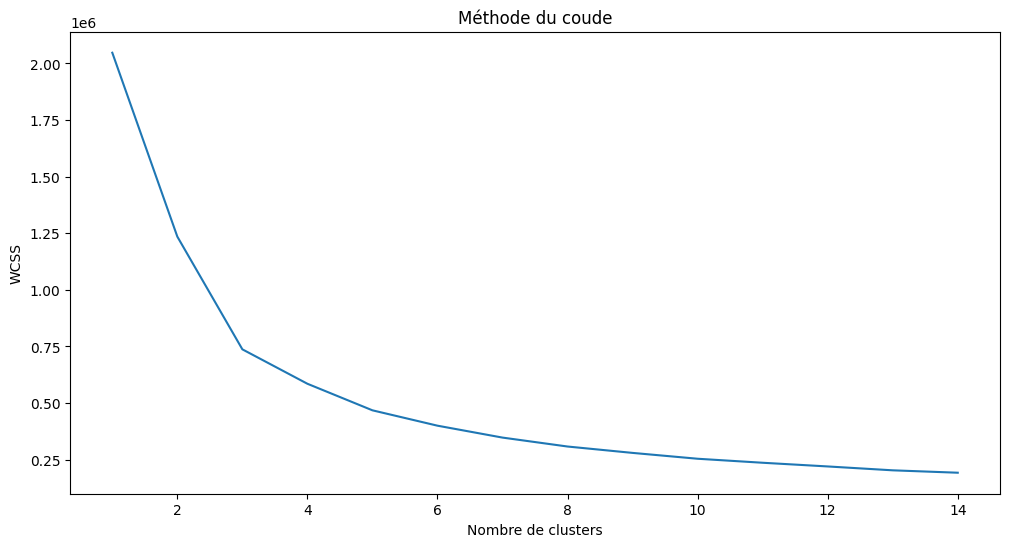

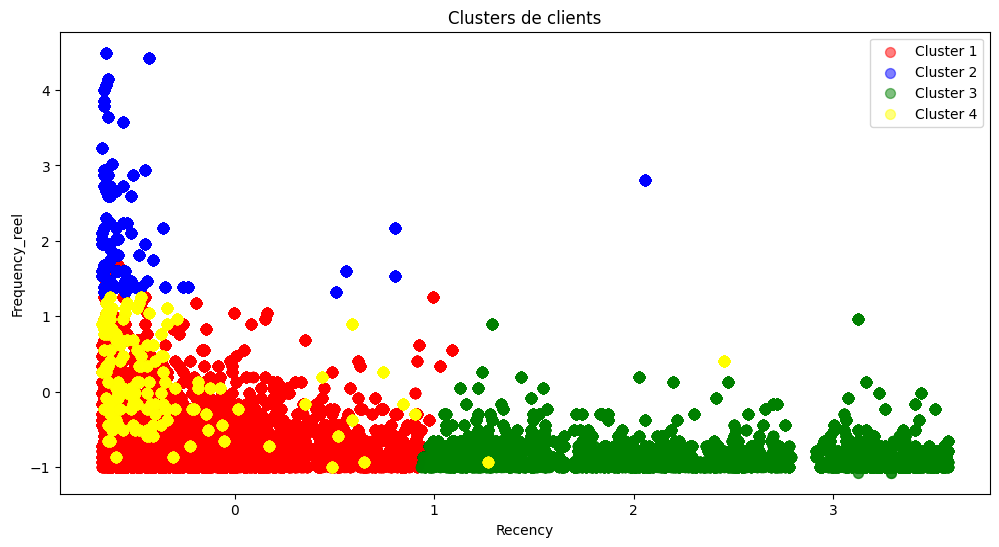

In [162]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalisation des données
scaler = StandardScaler()
data = scaler.fit_transform(df[['Recency', 'Frequency_reel', 'Montant']])

# Détermination du nombre optimal de clusters en utilisant la méthode du coude
wcss = []
for i in range(1, 15):
 kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
 kmeans.fit(data)
 wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1, 15), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

# Entraînement du modèle KMeans avec le nombre optimal de clusters
n_clusters = 4 # Remplacez cette valeur par le nombre optimal de clusters déterminé à l'aide de la méthode du coude
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data)

# Visualisation des clusters
plt.figure(figsize=(12,6))
plt.scatter(data[pred_y == 0, 0], data[pred_y == 0, 1], s=50, c='red', label='Cluster 1', alpha=0.5)
plt.scatter(data[pred_y == 1, 0], data[pred_y == 1, 1], s=50, c='blue', label='Cluster 2', alpha=0.5)
plt.scatter(data[pred_y == 2, 0], data[pred_y == 2, 1], s=50, c='green', label='Cluster 3', alpha=0.5)
plt.scatter(data[pred_y == 3, 0], data[pred_y == 3, 1], s=50, c='yellow', label='Cluster 4', alpha=0.5)

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de clients')
plt.xlabel('Recency')
plt.ylabel('Frequency_reel')
plt.legend()
plt.show()


## Cellule 1 : Ajustement du modèle KMeans


In [163]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supprimer la colonne 'Country'
df = df.drop('Country', axis=1)

# Sélectionner uniquement les colonnes numériques
df_numerique = df[['Recency', 'Frequency_reel', 'Montant']]

# Normaliser les données
normalisateur = StandardScaler()
df_normalise = normalisateur.fit_transform(df_numerique)

# Ajuster le modèle KMeans avec les données normalisées
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Vous pouvez changer le nombre de clusters
kmeans.fit(df_normalise)

# Ajouter les étiquettes de cluster pour chaque point de données au dataframe
df['Cluster'] = kmeans.labels_


## Cellule 2 :  visualisation des clusters

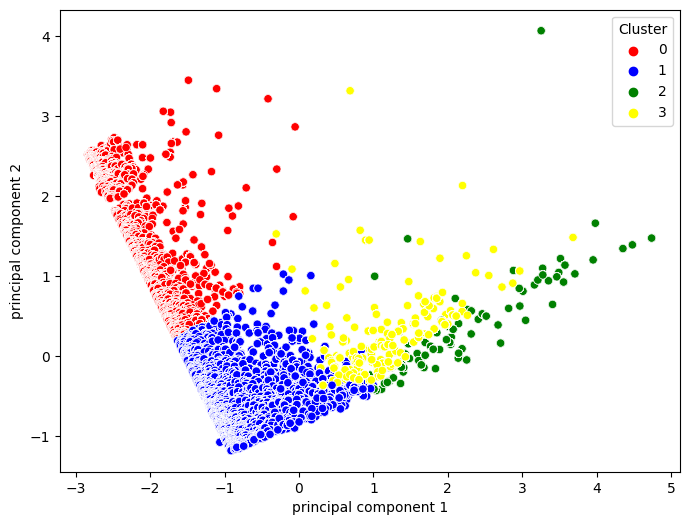

In [164]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer l'ACP
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normalise)

# Créer un DataFrame avec les composantes principales
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Ajouter les labels de cluster au DataFrame
principalDf['Cluster'] = kmeans.labels_

# Visualiser les clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="principal component 1", y="principal component 2", hue="Cluster", data=principalDf, palette=['red','blue','green', 'yellow'])
plt.show()

In [165]:
print(df.columns)


Index(['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'year', 'month',
       'Price', 'Customer ID', 'Total', 'total_facture',
       'nombre_commande_client_années_2009',
       'nombre_commande_client_années_2010',
       'nombre_commande_client_années_2011',
       'nombre_commande_client_années_annulées_2009',
       'nombre_commande_client_années_annulées_2010',
       'nombre_commande_client_années_annulées_2011', 'TT_annuler',
       'Continent', 'Recency', 'Frequency', 'Frequency_reel', 'Montant',
       'Cluster'],
      dtype='object')


In [166]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt

# # Normalisation des données
# scaler = StandardScaler()
# data = scaler.fit_transform(df[[ 'Frequency_reel', 'Montant']])

# # Détermination du nombre optimal de clusters en utilisant la méthode du coude
# wcss = []
# for i in range(1, 15):
#  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#  kmeans.fit(data)
#  wcss.append(kmeans.inertia_)

# plt.figure(figsize=(12,6))
# plt.plot(range(1, 15), wcss)
# plt.title('Méthode du coude')
# plt.xlabel('Nombre de clusters')
# plt.ylabel('WCSS')
# plt.show()

# # Entraînement du modèle KMeans avec le nombre optimal de clusters
# n_clusters = 3 # Remplacez cette valeur par le nombre optimal de clusters déterminé à l'aide de la méthode du coude
# kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
# pred_y = kmeans.fit_predict(data)

# # Visualisation des clusters
# plt.figure(figsize=(12,6))
# plt.scatter(data[pred_y == 0, 0], data[pred_y == 0, 1], s=50, c='red', label='Cluster 1', alpha=0.5)
# plt.scatter(data[pred_y == 1, 0], data[pred_y == 1, 1], s=50, c='blue', label='Cluster 2', alpha=0.5)
# plt.scatter(data[pred_y == 2, 0], data[pred_y == 2, 1], s=50, c='green', label='Cluster 3', alpha=0.5)
# plt.scatter(data[pred_y == 3, 0], data[pred_y == 3, 1], s=50, c='yellow', label='Cluster 4', alpha=0.5)

# # plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
# plt.title('Clusters de clients')
# plt.xlabel('Frequency_reel')
# plt.ylabel('Montant')
# plt.legend()
# plt.show()


In [167]:
# Group by cluster and calculate average RFM values
cluster_avg = df.groupby('Cluster').mean()

# Print the average values
print(cluster_avg)

          Quantity         year     month     Price   Customer ID      Total  \
Cluster                                                                        
0         9.117270  2010.195675  7.007189  3.351549  15372.273302  15.603542   
1        10.336594  2010.520044  7.837727  3.143030  15412.339045  16.489764   
2        13.599369  2010.376412  7.316563  3.215315  15280.950407  24.992640   
3         9.721572  2010.434701  7.221727  3.447237  15184.131683  16.940405   

         total_facture  nombre_commande_client_années_2009  \
Cluster                                                      
0           470.240652                            0.349635   
1           444.870721                            0.478272   
2           570.224518                            2.759531   
3           866.219226                            1.084756   

         nombre_commande_client_années_2010  \
Cluster                                       
0                                  4.729995   
1    

C:\Users\impej\AppData\Local\Temp\ipykernel_18408\3621010554.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



c:\Users\impej\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\impej\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\impej\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\impej\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\impej\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of

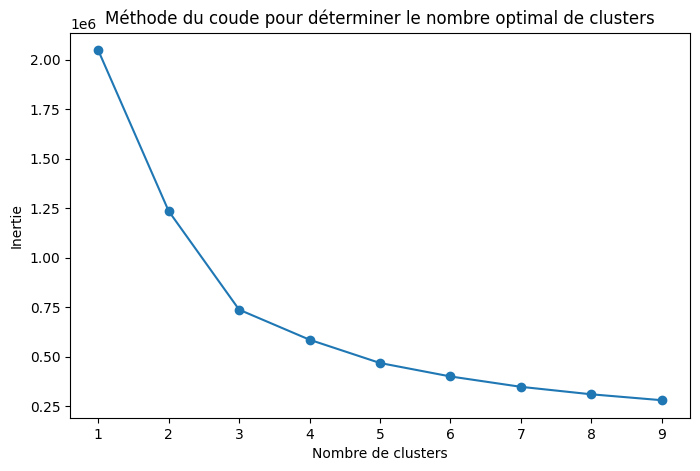

In [168]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Liste pour stocker les valeurs d'inertie pour chaque nombre de clusters
inertias = []

# Boucle sur plusieurs nombres de clusters
for k in range(1, 10):
    # Créer un modèle KMeans avec k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajuster le modèle aux données
    kmeans.fit(df_normalise)
    
    # Ajouter l'inertie du modèle à la liste
    inertias.append(kmeans.inertia_)

# Tracer l'inertie en fonction du nombre de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, 'o-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [169]:
# Describe each cluster
for i in df['Cluster'].unique():
    print(f'Cluster {i}')
    print(df[df['Cluster'] == i].describe())
    print('\n------------------------\n')

Cluster 1
            Quantity           year          month          Price  \
count  414517.000000  414517.000000  414517.000000  414517.000000   
mean       10.336594    2010.520044       7.837727       3.143030   
std        66.900699       0.553998       3.302092      13.149934   
min     -7128.000000    2009.000000       1.000000       0.000000   
25%         2.000000    2010.000000       5.000000       1.250000   
50%         5.000000    2011.000000       9.000000       1.950000   
75%        12.000000    2011.000000      11.000000       3.750000   
max     12540.000000    2011.000000      12.000000    2033.100000   

         Customer ID          Total  total_facture  \
count  414517.000000  414517.000000  414517.000000   
mean    15412.339045      16.489764     444.870721   
std      1651.108306      43.058011     415.611782   
min     12347.000000   -1998.490000  -11880.840000   
25%     14071.000000       4.250000     228.930000   
50%     15482.000000      11.400000     353.

In [170]:
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Total,total_facture,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler,Continent,Recency,Frequency,Frequency_reel,Montant,Cluster
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,83.40,505.30,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,157,10.0,8.0,27639.60,1
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,81.00,505.30,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,157,10.0,8.0,27639.60,1
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,81.00,505.30,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,157,10.0,8.0,27639.60,1
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,100.80,505.30,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,157,10.0,8.0,27639.60,1
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,30.00,505.30,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,157,10.0,8.0,27639.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824342,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,12.60,267.45,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,0,4.0,4.0,13193.46,1
824343,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,16.60,267.45,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,0,4.0,4.0,13193.46,1
824344,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,16.60,267.45,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,0,4.0,4.0,13193.46,1
824345,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,14.85,267.45,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,0,4.0,4.0,13193.46,1


In [171]:
# Remplacez "df" par le nom de votre dataframe
cluster_counts = df.groupby('Cluster')['Customer ID'].nunique()

print(cluster_counts)



Cluster
0    1392
1    3104
2      83
3     154
Name: Customer ID, dtype: int64


In [172]:
# Remplacez "df" par le nom de votre dataframe
cluster_0_count = df.loc[df['Cluster'] == 0, 'Customer ID'].nunique()

print(f"Il y a {cluster_0_count} valeurs uniques dans la colonne 'Customer ID' pour le cluster 0.")


Il y a 1392 valeurs uniques dans la colonne 'Customer ID' pour le cluster 0.


In [173]:
# Remplacez "df" par le nom de votre dataframe
invoices_clusters = df.loc[df['Customer ID'] == 13085.0, ['Invoice', 'Cluster','Customer ID']].drop_duplicates()
invoices_clusters



,Invoice,Cluster,Customer ID
0,489434,1,13085.0
8,489435,1,13085.0
5841,490068,1,13085.0
5850,490069,1,13085.0
52069,496092,1,13085.0
52216,496166,1,13085.0
315677,C527339,1,13085.0
477986,544306,1,13085.0
537526,C551464,1,13085.0
597166,558996,1,13085.0


C:\Users\impej\AppData\Local\Temp\ipykernel_18408\829232191.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



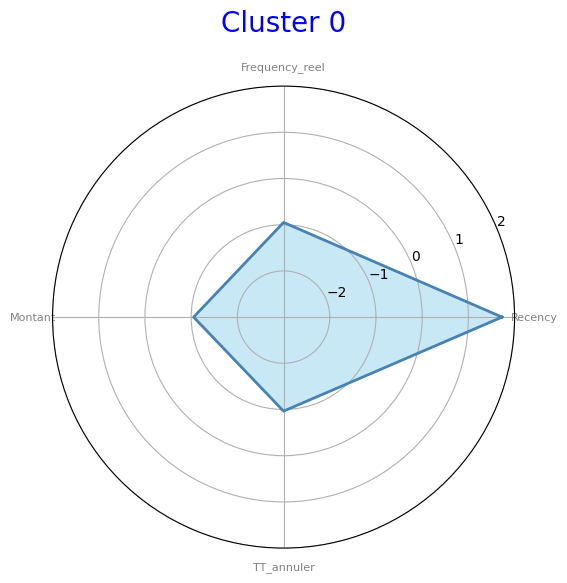

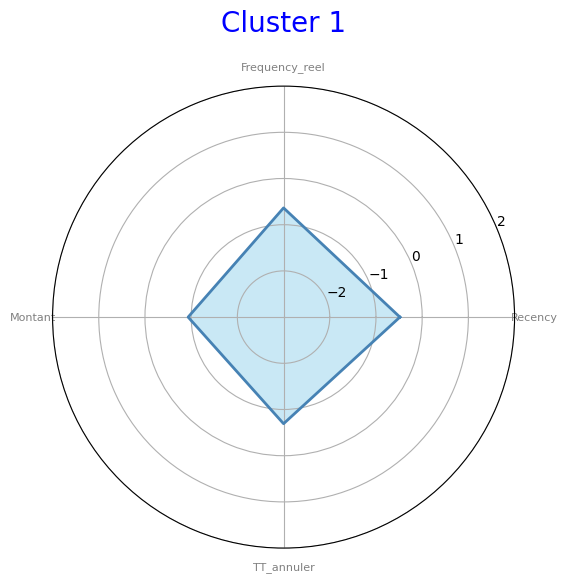

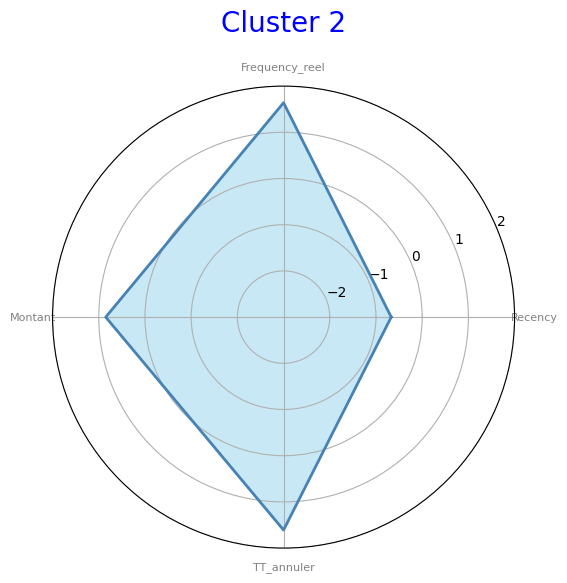

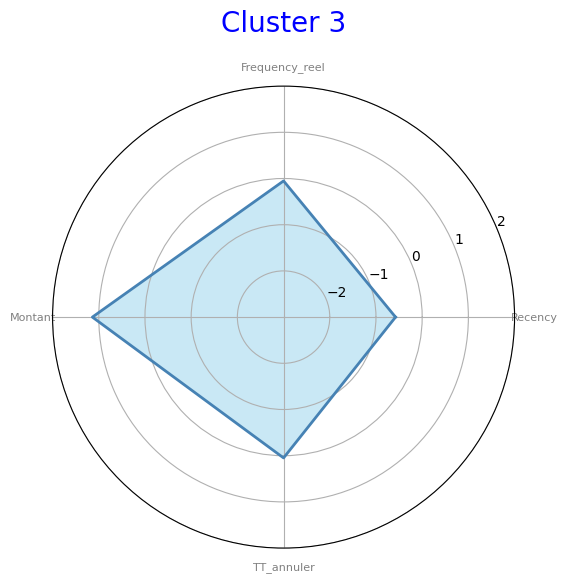

In [174]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Calculate average RFM values for each cluster
cluster_avg = df.groupby('Cluster').mean().reset_index()

# Normalize the cluster averages
scaler = StandardScaler()
cluster_avg_normalized = scaler.fit_transform(cluster_avg[['Recency', 'Frequency_reel', 'Montant', 'TT_annuler']])

# Convert back to DataFrame and add the Cluster column back
cluster_avg_normalized = pd.DataFrame(cluster_avg_normalized, columns=['Recency', 'Frequency_reel', 'Montant', 'TT_annuler'])
cluster_avg_normalized['Cluster'] = cluster_avg['Cluster']

# Number of variables we're plotting
num_vars = 4

# Split the circle into even parts and save the angles
# so we know where to put each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end
angles += angles[:1]

# Loop through each cluster
for i, row in cluster_avg_normalized.iterrows():
 fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
 
 # Draw one axe per variable + add labels
 plt.xticks(angles[:-1], ['Recency', 'Frequency_reel', 'Montant', 'TT_annuler'], color='grey', size=8)
 # Values
 values = row.drop('Cluster').values.flatten().tolist()
 values += values[:1]
 
 # Draw filled area
 ax.fill(angles, values, color='skyblue', alpha=0.25)
 ax.fill(angles, values, color='skyblue', alpha=0.25)
 ax.plot(angles, values, color='steelblue', linewidth=2)
 
 # Set title
 plt.title('Cluster ' + str(int(row['Cluster'])), size=20, color='blue', y=1.1)
 ax.set_ylim([-3, 2])
 # Show the graph
 plt.show()


C:\Users\impej\AppData\Local\Temp\ipykernel_18408\2173563015.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



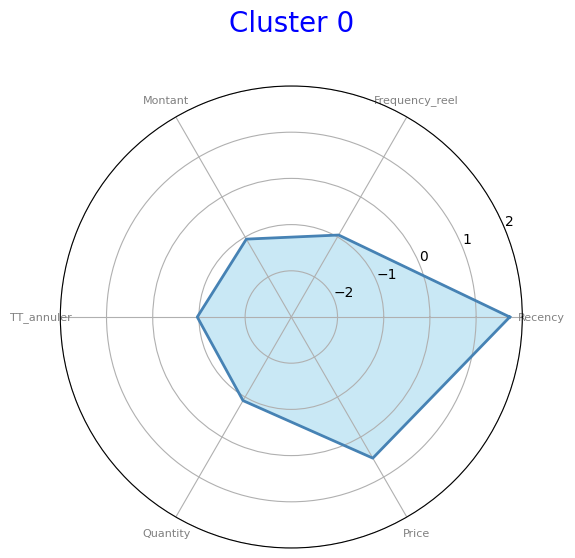

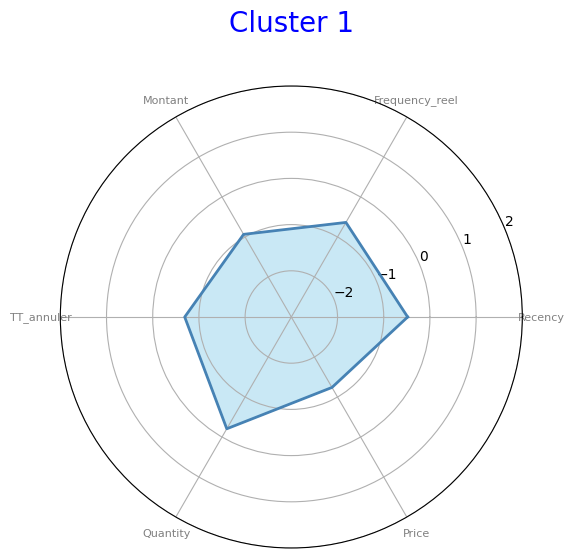

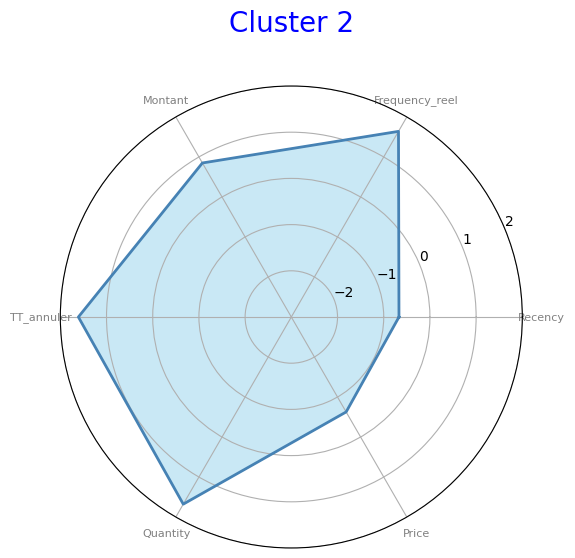

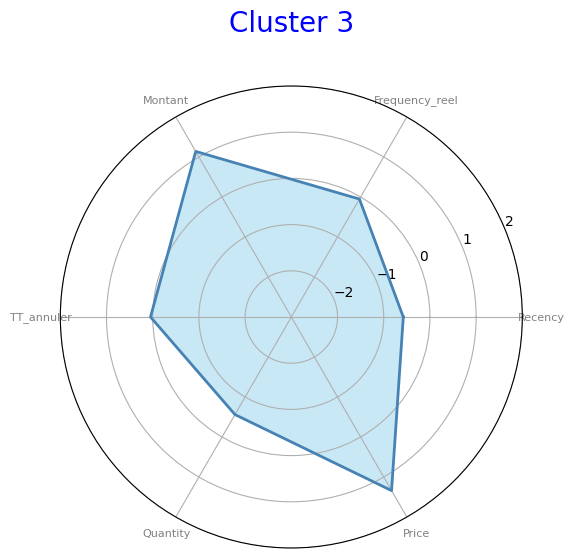

In [175]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Calculate average RFM values for each cluster
cluster_avg = df.groupby('Cluster').mean().reset_index()

# Normalize the cluster averages
scaler = StandardScaler()
cluster_avg_normalized = scaler.fit_transform(cluster_avg[['Recency', 'Frequency_reel', 'Montant', 'TT_annuler', 'Quantity', 'Price']])

# Convert back to DataFrame and add the Cluster column back
cluster_avg_normalized = pd.DataFrame(cluster_avg_normalized, columns=['Recency', 'Frequency_reel', 'Montant', 'TT_annuler', 'Quantity', 'Price'])
cluster_avg_normalized['Cluster'] = cluster_avg['Cluster']

# Number of variables we're plotting
num_vars = 6

# Split the circle into even parts and save the angles
# so we know where to put each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end
angles += angles[:1]

# Loop through each cluster
for i, row in cluster_avg_normalized.iterrows():
 fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
 
 # Draw one axe per variable + add labels
 plt.xticks(angles[:-1], ['Recency', 'Frequency_reel', 'Montant', 'TT_annuler', 'Quantity', 'Price'], color='grey', size=8)
 # Values
 values = row.drop('Cluster').values.flatten().tolist()
 values += values[:1]
 
 # Draw filled area
 ax.fill(angles, values, color='skyblue', alpha=0.25)
 ax.fill(angles, values, color='skyblue', alpha=0.25)
 ax.plot(angles, values, color='steelblue', linewidth=2)
 
 # Set title
 plt.title('Cluster ' + str(int(row['Cluster'])), size=20, color='blue', y=1.1)
 ax.set_ylim([-3, 2])
 # Show the graph
 plt.show()


In [176]:
df.to_csv("data/gold.csv" , index=False)  